In [138]:
import pandas as pd
import numpy as np

df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


array([[<AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

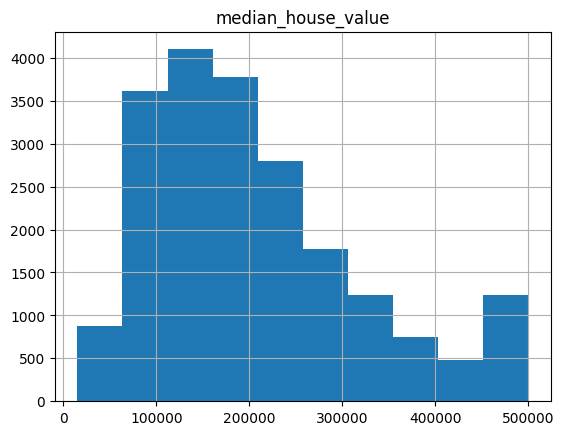

In [139]:
df.hist(column='median_house_value')

In [140]:
df = df[["latitude", "longitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [141]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [182]:
df['population'].median()

1166.0

In [187]:
def prepare_x(df):
	df_num = df.fillna(0)
	df_num = df_num.drop(columns=['median_house_value'])
	x = df_num.values
	return x

In [188]:
def prepare_x_mean(df):
	df_num = df.fillna(df['total_bedrooms'].mean())
	df_num = df_num.drop(columns=['median_house_value'])
	x = df_num.values
	return x

In [189]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [190]:
df_train = df.iloc[idx[:n_train]]
y_train = df_train['median_house_value'].values
x_train_0 = prepare_x(df_train)
x_train_mean = prepare_x_mean(df_train)
df_val = df.iloc[idx[n_train:n_train+n_val]]
y_val = df_val['median_house_value'].values
x_val_0 = prepare_x(df_val)
x_val_mean = prepare_x_mean(df_val)
df_test = df.iloc[idx[n_train+n_val:]]
y_test = df_test['median_house_value'].values
x_test_0 = prepare_x(df_test)
x_test_mean = prepare_x_mean(df_test)
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

def train_linear_regression(x, y):
	ones = np.ones(x.shape[0])
	x = np.column_stack([ones, x])

	XTX = x.T.dot(x)
	XTX_inv = np.linalg.inv(XTX)
	w_full = XTX_inv.dot(x.T).dot(y)

	return (w_full[0], w_full[1:])



<AxesSubplot:ylabel='Count'>

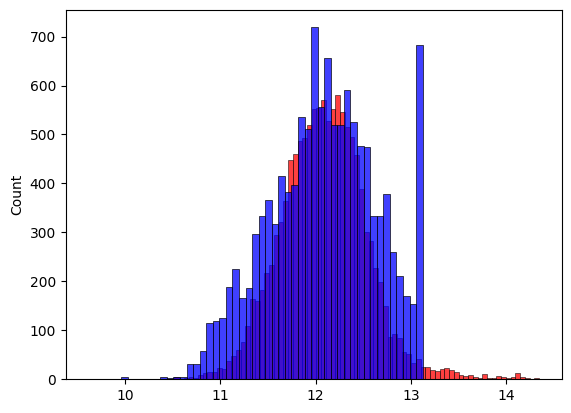

In [191]:
#x_train_0 = np.array(x_train_0)
w0_0, w_0 = train_linear_regression(x_train_0, y_train)
y_pred_0 = w0_0 + x_train_0.dot(w_0)

import seaborn as sns
sns.histplot(y_pred_0, color='red')
sns.histplot(y_train, color='blue')



<AxesSubplot:ylabel='Count'>

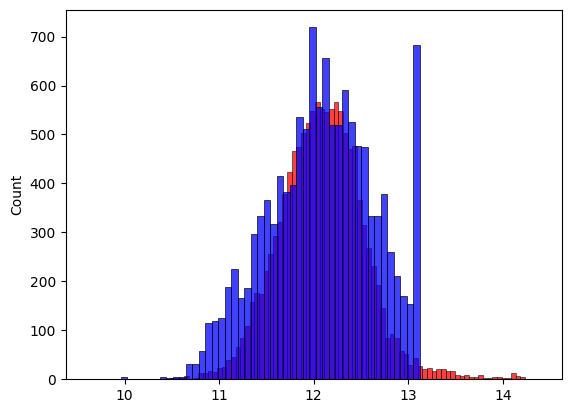

In [192]:
x_train_mean = np.array(x_train_mean)
w0_mean, w_mean = train_linear_regression(x_train_mean, y_train)
y_pred_mean = w0_mean + x_train_mean.dot(w_mean)

sns.histplot(y_pred_mean, color='red')
sns.histplot(y_train, color='blue')

In [193]:
def rmse(y, y_pred):
	error = y - y_pred
	se = error ** 2
	mse = se.mean()
	return np.sqrt(mse)

In [194]:
rmse(y_train, y_pred_0)

0.3413135910156676

In [195]:
rmse(y_train, y_pred_mean)

0.34104161810328065

In [197]:
y_pred_0 = w0_0 + x_val_0.dot(w_0)
y_pred_mean = w0_mean + x_val_mean.dot(w_mean)

In [198]:
rmse_0 = rmse(y_val, y_pred_0)
rmse_mean = rmse(y_val, y_pred_mean)

In [199]:
round(rmse_0, 2)

0.33

In [200]:
round(rmse_mean, 2)

0.33

In [201]:
def train_linear_regression_reg(x, y, r=0.001):
	ones = np.ones(x.shape[0])
	x = np.column_stack([ones, x])

	XTX = x.T.dot(x)
	XTX = XTX + r * np.eye(XTX.shape[0])
	XTX_inv = np.linalg.inv(XTX)
	w_full = XTX_inv.dot(x.T).dot(y)

	return (w_full[0], w_full[1:])

w0, w = train_linear_regression_reg(x_train_0, y_train, r=0)
y_pred_0 = w0 + x_val_0.dot(w)
round(rmse(y_val, y_pred_0), 2)

0.33

In [202]:
w0, w = train_linear_regression_reg(x_train_0, y_train, r=0.000001)
y_pred_0 = w0 + x_val_0.dot(w)
round(rmse(y_val, y_pred_0), 2)

0.33

In [203]:
w0, w = train_linear_regression_reg(x_train_0, y_train, r=0.0001)
y_pred_0 = w0 + x_val_0.dot(w)
round(rmse(y_val, y_pred_0), 2)

0.33

In [204]:
w0, w = train_linear_regression_reg(x_train_0, y_train, r=0.001)
y_pred_0 = w0 + x_val_0.dot(w)
round(rmse(y_val, y_pred_0), 2)

0.33

In [205]:
w0, w = train_linear_regression_reg(x_train_0, y_train, r=0.01)
y_pred_0 = w0 + x_val_0.dot(w)
round(rmse(y_val, y_pred_0), 2)

0.33

In [206]:
w0, w = train_linear_regression_reg(x_train_0, y_train, r=0.1)
y_pred_0 = w0 + x_val_0.dot(w)
round(rmse(y_val, y_pred_0), 2)

0.33

In [207]:
w0, w = train_linear_regression_reg(x_train_0, y_train, r=1)
y_pred_0 = w0 + x_val_0.dot(w)
round(rmse(y_val, y_pred_0), 2)

0.33

In [208]:
w0, w = train_linear_regression_reg(x_train_0, y_train, r=5)
y_pred_0 = w0 + x_val_0.dot(w)
round(rmse(y_val, y_pred_0), 2)

0.34

In [209]:
w0, w = train_linear_regression_reg(x_train_0, y_train, r=10)
y_pred_0 = w0 + x_val_0.dot(w)
round(rmse(y_val, y_pred_0), 2)

0.34

In [210]:
rmse_arr=[]
rmse_arr = [0 for i in range(10)]
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.seed(0)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
y_train = df_train['median_house_value'].values
x_train = prepare_x(df_train)
df_val = df.iloc[idx[n_train:n_train+n_val]]
y_val = df_val['median_house_value'].values
x_val = prepare_x(df_val)
df_test = df.iloc[idx[n_train+n_val:]]
y_test = df_test['median_house_value'].values
x_test = prepare_x(df_test)
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_val_0.dot(w)
rmse_arr[0] = rmse(y_val, y_pred)


In [211]:
idx = np.arange(n)
np.random.seed(1)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
y_train = df_train['median_house_value'].values
x_train = prepare_x(df_train)
df_val = df.iloc[idx[n_train:n_train+n_val]]
y_val = df_val['median_house_value'].values
x_val = prepare_x(df_val)
df_test = df.iloc[idx[n_train+n_val:]]
y_test = df_test['median_house_value'].values
x_test = prepare_x(df_test)
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_val_0.dot(w)
rmse_arr[1] = rmse(y_val, y_pred)


In [212]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
y_train = df_train['median_house_value'].values
x_train = prepare_x(df_train)
df_val = df.iloc[idx[n_train:n_train+n_val]]
y_val = df_val['median_house_value'].values
x_val = prepare_x(df_val)
df_test = df.iloc[idx[n_train+n_val:]]
y_test = df_test['median_house_value'].values
x_test = prepare_x(df_test)
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_val_0.dot(w)
rmse_arr[2] = rmse(y_val, y_pred)


In [213]:
idx = np.arange(n)
np.random.seed(3)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
y_train = df_train['median_house_value'].values
x_train = prepare_x(df_train)
df_val = df.iloc[idx[n_train:n_train+n_val]]
y_val = df_val['median_house_value'].values
x_val = prepare_x(df_val)
df_test = df.iloc[idx[n_train+n_val:]]
y_test = df_test['median_house_value'].values
x_test = prepare_x(df_test)
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_val_0.dot(w)
rmse_arr[3] = rmse(y_val, y_pred)


In [214]:
idx = np.arange(n)
np.random.seed(4)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
y_train = df_train['median_house_value'].values
x_train = prepare_x(df_train)
df_val = df.iloc[idx[n_train:n_train+n_val]]
y_val = df_val['median_house_value'].values
x_val = prepare_x(df_val)
df_test = df.iloc[idx[n_train+n_val:]]
y_test = df_test['median_house_value'].values
x_test = prepare_x(df_test)
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_val_0.dot(w)
rmse_arr[4] = rmse(y_val, y_pred)


In [215]:
idx = np.arange(n)
np.random.seed(5)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
y_train = df_train['median_house_value'].values
x_train = prepare_x(df_train)
df_val = df.iloc[idx[n_train:n_train+n_val]]
y_val = df_val['median_house_value'].values
x_val = prepare_x(df_val)
df_test = df.iloc[idx[n_train+n_val:]]
y_test = df_test['median_house_value'].values
x_test = prepare_x(df_test)
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_val_0.dot(w)
rmse_arr[5] = rmse(y_val, y_pred)


In [216]:
idx = np.arange(n)
np.random.seed(6)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
y_train = df_train['median_house_value'].values
x_train = prepare_x(df_train)
df_val = df.iloc[idx[n_train:n_train+n_val]]
y_val = df_val['median_house_value'].values
x_val = prepare_x(df_val)
df_test = df.iloc[idx[n_train+n_val:]]
y_test = df_test['median_house_value'].values
x_test = prepare_x(df_test)
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_val_0.dot(w)
rmse_arr[6] = rmse(y_val, y_pred)


In [217]:
idx = np.arange(n)
np.random.seed(7)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
y_train = df_train['median_house_value'].values
x_train = prepare_x(df_train)
df_val = df.iloc[idx[n_train:n_train+n_val]]
y_val = df_val['median_house_value'].values
x_val = prepare_x(df_val)
df_test = df.iloc[idx[n_train+n_val:]]
y_test = df_test['median_house_value'].values
x_test = prepare_x(df_test)
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_val_0.dot(w)
rmse_arr[7] = rmse(y_val, y_pred)


In [218]:
idx = np.arange(n)
np.random.seed(8)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
y_train = df_train['median_house_value'].values
x_train = prepare_x(df_train)
df_val = df.iloc[idx[n_train:n_train+n_val]]
y_val = df_val['median_house_value'].values
x_val = prepare_x(df_val)
df_test = df.iloc[idx[n_train+n_val:]]
y_test = df_test['median_house_value'].values
x_test = prepare_x(df_test)
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_val_0.dot(w)
rmse_arr[8] = rmse(y_val, y_pred)


In [219]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
y_train = df_train['median_house_value'].values
x_train = prepare_x(df_train)
df_val = df.iloc[idx[n_train:n_train+n_val]]
y_val = df_val['median_house_value'].values
x_val = prepare_x(df_val)
df_test = df.iloc[idx[n_train+n_val:]]
y_test = df_test['median_house_value'].values
x_test = prepare_x(df_test)
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_val_0.dot(w)
rmse_arr[9] = rmse(y_val, y_pred)


In [226]:
round(np.std(rmse_arr), 3)

0.006

In [225]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
y_test = df_test['median_house_value'].values
df_train_val = pd.concat([df_train, df_val])
y_train_val = df_train_val['median_house_value'].values
x_train_val = prepare_x(df_train_val)
x_test = prepare_x(df_test)
y_train_val = np.log1p(y_train_val)
y_test = np.log1p(y_test)
w0, w = train_linear_regression_reg(x_train_val, y_train_val, r=0.001)
y_pred = w0 + x_test.dot(w)
round(rmse(y_test, y_pred), 2)

0.35